<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Dictionary" data-toc-modified-id="Data-Dictionary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Dictionary</a></span></li><li><span><a href="#Acquire-df" data-toc-modified-id="Acquire-df-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Acquire df</a></span><ul class="toc-item"><li><span><a href="#DF-Info" data-toc-modified-id="DF-Info-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DF Info</a></span></li></ul></li><li><span><a href="#Prepare-df" data-toc-modified-id="Prepare-df-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prepare df</a></span><ul class="toc-item"><li><span><a href="#Rename-Columns" data-toc-modified-id="Rename-Columns-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Rename Columns</a></span></li><li><span><a href="#Convert-date-column-to-datetime-format" data-toc-modified-id="Convert-date-column-to-datetime-format-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Convert date column to datetime format</a></span></li><li><span><a href="#Create-Date-Part-Columns" data-toc-modified-id="Create-Date-Part-Columns-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Create Date Part Columns</a></span></li><li><span><a href="#Unique-Values-in-Columns" data-toc-modified-id="Unique-Values-in-Columns-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Unique Values in Columns</a></span></li><li><span><a href="#Missing-Scheduled-Time-Points" data-toc-modified-id="Missing-Scheduled-Time-Points-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Missing Scheduled Time Points</a></span></li><li><span><a href="#On-Time-Percentage" data-toc-modified-id="On-Time-Percentage-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>On Time Percentage</a></span></li><li><span><a href="#There-are-4-Primo-routes-in-the-dataset?-Man,-Fredricksburg-primo-has-3-different-names-for-Primo-route!" data-toc-modified-id="There-are-4-Primo-routes-in-the-dataset?-Man,-Fredricksburg-primo-has-3-different-names-for-Primo-route!-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>There are 4 Primo routes in the dataset? Man, Fredricksburg primo has 3 different names for Primo route!</a></span></li><li><span><a href="#Groupby-route" data-toc-modified-id="Groupby-route-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Groupby <code>route</code></a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Dictionary

| Field Name | Description |
|:---------|--------:|
|ServiceDateTime  | The day the vehicle is in operation|
|Routes|Transit routes. A route is a group of trips that are displayed to riders as a single service|
|RouteName | Name of a route |
| EarlyDeparture | Number of times a vehicle departed early from a timepoint in relation to a scheduled time |
| OnTime | Number of times a vehicle arrived on time at a timepoint in relation to a scheduled time |
| LateArrival | Number of times a vehicle arrived late at a timepoint in relation to a scheduled time |
| Missing | Number of times a vehicle missed a given timepoint |
| TimePointCount | Number of total timepoints |
| OTP | On time percentage (OnTime / TimePointCount) |
| AverageDwellTime | Dwell time average in seconds |

## Acquire df

In [2]:
time = pd.read_csv('../resource_files/BusOnTimePerformance_2020.csv', encoding= 'unicode_escape')
time.head()

,ï»¿ServiceDateTime,Route,RouteName,EarlyDeparture,OnTime,LateArrival,Missing,TimePointCount,OTP,AverageDwellTime
0,2/12/18,2,BLANCO,83,626,87,82,796,78.64,103.97
1,2/12/18,3,SAN PEDRO SKIP,5,518,78,11,601,86.19,167.29
2,2/12/18,4,SAN PEDRO Frequent,21,454,109,130,584,77.74,78.31
3,2/12/18,5,McCULLOUGH,7,403,30,10,440,91.59,211.44
4,2/12/18,6,US-281 Express,1,54,22,11,77,70.13,163.19


### DF Info

In [3]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107319 entries, 0 to 107318
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ï»¿ServiceDateTime  107319 non-null  object 
 1   Route               107319 non-null  int64  
 2   RouteName           107319 non-null  object 
 3   EarlyDeparture      107319 non-null  int64  
 4   OnTime              107319 non-null  int64  
 5   LateArrival         107319 non-null  int64  
 6   Missing             107319 non-null  int64  
 7   TimePointCount      107319 non-null  int64  
 8   OTP                 107156 non-null  float64
 9   AverageDwellTime    107155 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 8.2+ MB


In [4]:
print(f'Our dataframe is coming in with {time.shape[0]} rows and {time.shape[1]} columns.')

Our dataframe is coming in with 107319 rows and 10 columns.


In [5]:
time.describe()

,Route,EarlyDeparture,OnTime,LateArrival,Missing,TimePointCount,OTP,AverageDwellTime
count,107319.000000,107319.000000,107319.000000,107319.000000,107319.000000,107319.000000,107156.000000,107155.000000
mean,283.527306,12.502698,260.550173,51.761254,27.643819,324.814124,80.759492,168.929860
std,273.696866,14.296002,169.184607,50.643493,36.597174,211.319485,10.350505,61.506276
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.810000
25%,36.000000,3.000000,129.000000,16.000000,5.000000,160.000000,75.260000,126.200000
50%,93.000000,8.000000,219.000000,36.000000,13.000000,271.000000,82.420000,163.030000
75%,607.000000,16.000000,359.000000,72.000000,37.000000,460.000000,88.210000,203.195000
max,999.000000,159.000000,1453.000000,497.000000,557.000000,1628.000000,100.000000,1231.000000


## Prepare df

### Rename Columns

In [6]:
time.columns = ['date', 'route', 'route_name', 'early_departure', 'on_time',
       'late_arrival', 'missing', 'time_point_count', 'otp', 'average_dwell_time']


In [7]:
time.head(1)

,date,route,route_name,early_departure,on_time,late_arrival,missing,time_point_count,otp,average_dwell_time
0,2/12/18,2,BLANCO,83,626,87,82,796,78.64,103.97


### Convert date column to datetime format

In [8]:
time['date'] = pd.to_datetime(time.date)
time = time.set_index('date').sort_index()

In [9]:
time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107319 entries, 2017-01-01 to 2020-05-04
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   route               107319 non-null  int64  
 1   route_name          107319 non-null  object 
 2   early_departure     107319 non-null  int64  
 3   on_time             107319 non-null  int64  
 4   late_arrival        107319 non-null  int64  
 5   missing             107319 non-null  int64  
 6   time_point_count    107319 non-null  int64  
 7   otp                 107156 non-null  float64
 8   average_dwell_time  107155 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 8.2+ MB


### Create Date Part Columns

In [10]:
time['month'] = time.index.month
time['year'] = time.index.year
time['day'] = time.index.day_name()

In [11]:
time.head(2)

,route,route_name,early_departure,on_time,late_arrival,missing,time_point_count,otp,average_dwell_time,month,year,day
date,,,,,,,,,,,,
2017-01-01,642,NACOGDOCHES,1,89,2,0,92,96.74,164.04,1,2017,Sunday
2017-01-01,520,ZARZAMORA,47,726,45,8,818,88.75,178.65,1,2017,Sunday


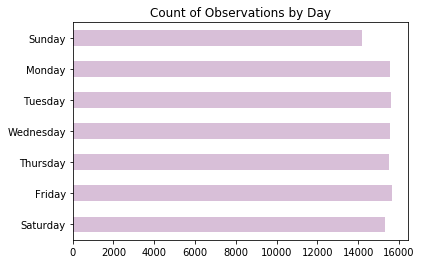

In [12]:
cats = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

time.day.value_counts().reindex(cats).plot.barh(color='thistle')

plt.title('Count of Observations by Day')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()
plt.show()

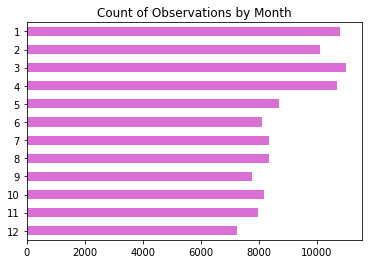

In [13]:
time.month.value_counts().sort_index().plot.barh(color='orchid')

plt.title('Count of Observations by Month')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()
plt.show()

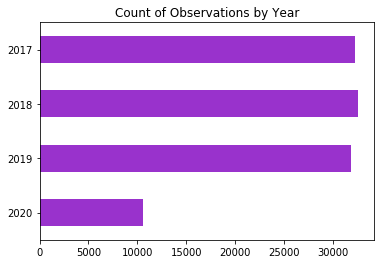

In [14]:
time.year.value_counts().sort_index().plot.barh(color='darkorchid')

plt.title('Count of Observations by Year')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()
plt.show()

### Unique Values in Columns

First we need to normalize the route_names column because it's a mess with upper- and lowercase.

<font color=purple>This dropped unique values in route_name from 298 to 250, removing starting numbers further reduced unique route names to 249, removing starting hyphens to 211.</font>

In [15]:
time.route_name = time.route_name.str.lower()
time.route_name = time.route_name.str.replace(r'^\d+', '', regex=True).str.strip()
time.route_name = time.route_name.str.replace(r'^\-', '').str.strip()

In [16]:
time[time.route_name.str.startswith('-')]

,route,route_name,early_departure,on_time,late_arrival,missing,time_point_count,otp,average_dwell_time,month,year,day
date,,,,,,,,,,,,


In [17]:
time.groupby(['route', 'route_name'])[['route_name']].count()

route_name
route route_name                     
2     blanco                      711
      blanco frequent             469
      blanco rd.                   22
3     san pedro skip             1202
4     san pedro                    22
...                               ...
705   madla special                 2
712   airport special               2
715   crossroads special            2
999   encino courtesy van           1
      gsa shuttle                   4

[210 rows x 1 columns]

**<font color=purple>We still see that there are only 103 unique routes but 208 unique route names. Further normalization of route names needed.</font>**

In [18]:
for column in time:
    print(f'There are {time[column].nunique()} unique values in the {column} column')
    print()

There are 103 unique values in the route column

There are 208 unique values in the route_name column

There are 141 unique values in the early_departure column

There are 1074 unique values in the on_time column

There are 406 unique values in the late_arrival column

There are 335 unique values in the missing column

There are 1242 unique values in the time_point_count column

There are 5475 unique values in the otp column

There are 25512 unique values in the average_dwell_time column

There are 12 unique values in the month column

There are 4 unique values in the year column

There are 7 unique values in the day column



### Missing Scheduled Time Points

In [19]:
# Create a df that does not have the datatime index

df = time.reset_index()

In [20]:
df.missing.nlargest(n=22)

104894    557
104982    557
105070    557
105170    557
105258    557
105344    557
105422    557
105504    557
105588    557
105696    557
105792    557
105881    557
105950    557
106033    557
106113    557
106219    557
106308    557
106374    557
106482    557
106568    557
106609    557
68492     544
Name: missing, dtype: int64

In [21]:
df.iloc[104894]

date                  2020-04-06 00:00:00
route                                  11
route_name                   viva culture
early_departure                         0
on_time                                 0
late_arrival                            0
missing                               557
time_point_count                        0
otp                                   NaN
average_dwell_time                    NaN
month                                   4
year                                 2020
day                                Monday
Name: 104894, dtype: object

In [22]:
df.iloc[104982]

date                  2020-04-07 00:00:00
route                                  11
route_name                   viva culture
early_departure                         0
on_time                                 0
late_arrival                            0
missing                               557
time_point_count                        0
otp                                   NaN
average_dwell_time                    NaN
month                                   4
year                                 2020
day                               Tuesday
Name: 104982, dtype: object

In [23]:
df.iloc[105070]

date                  2020-04-08 00:00:00
route                                  11
route_name                   viva culture
early_departure                         0
on_time                                 0
late_arrival                            0
missing                               557
time_point_count                        0
otp                                   NaN
average_dwell_time                    NaN
month                                   4
year                                 2020
day                             Wednesday
Name: 105070, dtype: object

In [24]:
df.iloc[106609]

date                  2020-04-26 00:00:00
route                                  11
route_name                   viva culture
early_departure                         0
on_time                                 0
late_arrival                            0
missing                               557
time_point_count                        0
otp                                   NaN
average_dwell_time                    NaN
month                                   4
year                                 2020
day                                Sunday
Name: 106609, dtype: object

In [25]:
df.iloc[68492]

date                     2019-02-09 00:00:00
route                                     20
route_name            new braunfels frequent
early_departure                           16
on_time                                  274
late_arrival                              11
missing                                  544
time_point_count                         301
otp                                    91.03
average_dwell_time                    188.39
month                                      2
year                                    2019
day                                 Saturday
Name: 68492, dtype: object

### On Time Percentage

Peek at routes with best and worst ontime percentages.

In [26]:
#Routes making it to stops at scheduled times more than 95% of the time.

time[time.otp > 95].route_name.value_counts().head(20)

valley-hi / kel-lac                 289
nacogdoches                         247
kel-lac / indian creek              195
ingram/mainland                     178
heritage nw / kel-lac               162
kel-lac / heritage park             156
kel-lac / westlakes                 146
ingram / mainland                   143
medical center / ingram             138
basse                               134
knollcreek                          131
kel-lac / rainbow hills             104
north star / harry wurzbach         101
tamusa / madla transit center        84
kel-lac/westlakes                    75
northwest vista college / ingram     74
babcock                              73
deco district / castle hills         64
ingram/nwvistas                      62
thousand oaks                        59
Name: route_name, dtype: int64

In [27]:
# Routes with issues making it to stops at scheduled times, less than 35% of the time.

time[time.otp < 35].route_name.value_counts()

deco district / castle hills     31
stone oak/downtown express       31
stone oak express                19
sunrise/summerfest                7
nwvistas/university p&r           5
laredo                            3
sunrise / summerfest              3
n st marys                        3
viva missions                     3
ingram/westlakes                  2
ih-35 south express               2
ih-35 s express                   2
sky harbour/kel-lac               2
us-281 express                    2
valley-hi / kel-lac               2
jbsa express / lackland / uso     2
east houston frequent             2
industry park                     2
airport special                   2
randolph / kirby / sunrise        2
san pedro frequent                2
randolph / ventura frequent       1
ingram/nwvistas                   1
randolph/kirby/sunrise            1
medical center/utsa               1
valley forge                      1
stoneoak/downtown express         1
nwvistas/univesity p&r      

### There are 4 Primo routes in the dataset? Man, Fredricksburg primo has 3 different names for Primo route!

**<font color=purple>It's becoming obvious that route_name needs to be normalized, so the routes match the names. There are different names in the dataset for the same routes.</font>**

In [28]:
time[time.route_name.str.contains('primo')].route_name.value_counts()

primo fred rd                  711
primo / zarzamora              469
primo / fredericksburg road    469
primo / military               238
primo leon valley/utsa          22
primo fredricksburg rd.         22
Name: route_name, dtype: int64

### Groupby `route`

In [29]:
df.head(1)

,date,route,route_name,early_departure,on_time,late_arrival,missing,time_point_count,otp,average_dwell_time,month,year,day
0,2017-01-01,642,nacogdoches,1,89,2,0,92,96.74,164.04,1,2017,Sunday


In [30]:
# Grouby route

df.groupby('route')[['early_departure', 'late_arrival', 'missing', 'otp']].agg(['min', 'max', 'mean', 'median'])

early_departure                        late_arrival                   \
                  min  max       mean median          min  max        mean   
route                                                                        
2                   0  136  48.905990   52.0            7  287  103.663062   
3                   0   49   9.398502    7.0            7  450  141.143927   
4                   1   58  19.858569   19.0            0  436  128.547421   
5                   0   51   9.814476    9.0            4  215   57.194676   
6                   0   24   5.072115    4.0            0  106   27.048077   
...               ...  ...        ...    ...          ...  ...         ...   
672                 0   53   8.172708    5.0            0  136   20.283582   
705                 3    4   3.500000    3.5            5   15   10.000000   
712                 1    2   1.500000    1.5            5   12    8.500000   
715                 0   11   5.500000    5.5            0   12    6.000000   
999                 0    0   0.000000    0.0            0    0    0.000000   

             missing                            otp                             
      median     min  max        mean median    min     max       mean  median  
route                                                                           
2      101.0       3  325   57.816140   45.0  42.42   94.41  77.850566  78.755  
3      116.0       0  368   53.662230   25.0  38.65   97.10  77.439850  78.730  
4      124.0       1  348   73.220466   60.5  30.58   96.68  73.716140  74.365  
5       54.0       0  174   17.688020   10.0  38.21   97.46  82.316073  83.525  
6       23.0       0   66   11.390625    8.0  22.99   96.63  72.539579  73.570  
...      ...     ...  ...         ...    ...    ...     ...        ...     ...  
672     14.0       0   79    8.477612    5.0  46.22  100.00  87.768294  89.450  
705     10.0      16   67   41.500000   41.5  21.74   50.00  35.870000  35.870  
712      8.5      46  167  106.500000  106.5  12.50   14.29  13.395000  13.395  
715      6.0      96  222  159.000000  159.0  42.50   42.50  42.500000  42.500  
999      0.0      64   64   64.000000   64.0    NaN     NaN        NaN     NaN  

[103 rows x 16 columns]

In [31]:
# Top 15 BEST median on time percentage

df.groupby('route')[['otp']].median().sort_values('otp', ascending=False).head(15)


,otp
route,
609,92.390
611,91.350
642,90.455
612,90.270
16,89.470
672,89.450
619,89.415
102,89.320
615,89.300


In [33]:
# Route with best median on time percentage

df[df.route == 609].head(1)

,date,route,route_name,early_departure,on_time,late_arrival,missing,time_point_count,otp,average_dwell_time,month,year,day
45,2017-01-01,609,ingram/mainland,1,81,8,3,90,90.0,169.8,1,2017,Sunday


In [34]:
# Top 15 WORST median on time percentage

df.groupby('route')[['otp']].median().sort_values('otp').head(15)


,otp
route,
712,13.395
705,35.870
715,42.500
7,55.170
97,65.610
54,68.320
64,70.305
552,70.755
76,70.945


In [35]:
# Route with worst median on time percentage

df[df.route == 712].head(1)

,date,route,route_name,early_departure,on_time,late_arrival,missing,time_point_count,otp,average_dwell_time,month,year,day
10405,2017-04-28,712,airport special,1,1,5,167,7,14.29,58.0,4,2017,Friday


In [36]:
# Route with second worst on time percentage

df[df.route == 705].head(1)

,date,route,route_name,early_departure,on_time,late_arrival,missing,time_point_count,otp,average_dwell_time,month,year,day
10404,2017-04-28,705,madla special,3,5,15,67,23,21.74,365.53,4,2017,Friday
